# Autoencoders

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/home/praveen/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
#train_data = pd.read_csv("/Users/ilabuser/Desktop/Praveen/numerai_datasets/numerai_training_data.csv")
train_data = pd.read_csv("/home/praveen/Documents/Data/numerai_datasets/numerai_training_data.csv")

In [3]:
train_data = train_data.drop(['target'], 1)

In [4]:
col_max = train_data.apply(max, axis=0)
col_min = train_data.apply(min, axis=0)

In [5]:
print zip(col_min,col_max)

[(0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0018737743108521397, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 0.98807223888845908), (0.0, 1.0), (0.0, 1.0), (0.019593786382100901, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 0.98057549554700207), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0)]


* All the features are in the range [0,1], decided not to normalize the features

In [6]:
corr = train_data.corr()

In [7]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

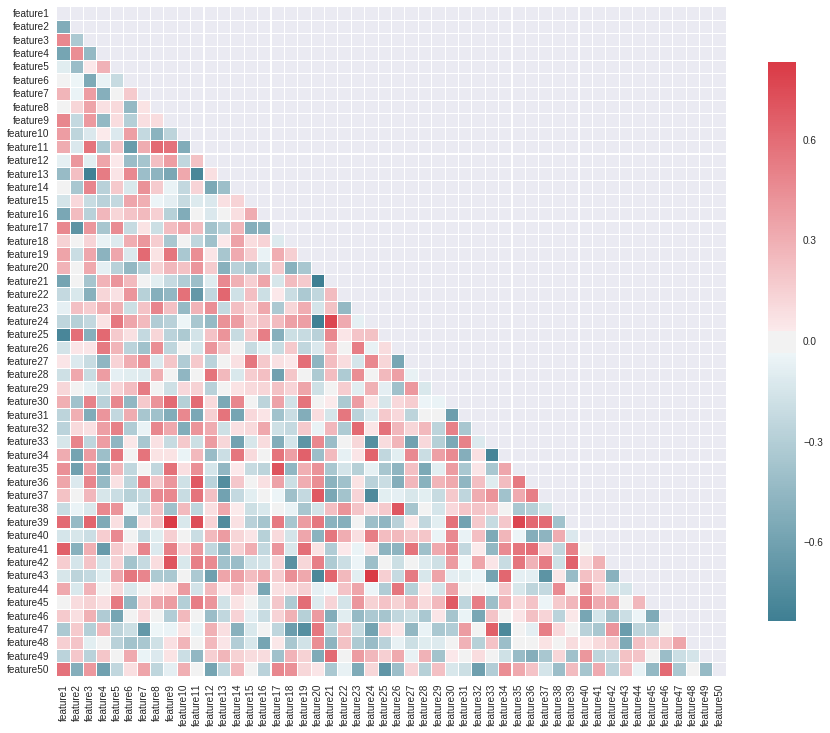

In [8]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.set(style="white")
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, 
            linewidths=0.1, 
            cbar_kws={"shrink": .5}, ax=ax)

# PCA                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [14]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [15]:
svd_solvers = ['auto', 'full', 'arpack', 'randomized']
for svd_solver in svd_solvers: 
    pca = PCA(n_components=5, svd_solver=svd_solver)
    pca_encomp = pca.fit_transform(train_data)
    pca_decomp = pca.inverse_transform(pca_encomp)
    pca_recon_loss = mean_squared_error(train_data, pca_decomp)
    print "PCA Reconstruction loss(",svd_solver,") : ", "{:.9f}".format(pca_recon_loss)

PCA Reconstruction loss( auto ) :  0.004497210
PCA Reconstruction loss( full ) :  0.004497210
PCA Reconstruction loss( arpack ) :  0.004497210
PCA Reconstruction loss( randomized ) :  0.004497210


In [16]:
for svd_solver in svd_solvers: 
    pca = PCA(n_components=5, svd_solver=svd_solver, whiten=True)
    pca_encomp = pca.fit_transform(train_data)
    pca_decomp = pca.inverse_transform(pca_encomp)
    pca_recon_loss = mean_squared_error(train_data, pca_decomp)
    print "PCA Reconstruction loss(",svd_solver,") : ", "{:.9f}".format(pca_recon_loss)

PCA Reconstruction loss( auto ) :  0.004497210
PCA Reconstruction loss( full ) :  0.004497210
PCA Reconstruction loss( arpack ) :  0.004497210
PCA Reconstruction loss( randomized ) :  0.004497210


* Different solvers with or without whiten are giving the same result

# Single Layer Autoencoder

<img src="Graphs/single-layer-autoencoder.png">

In [19]:
# Parameters
learning_rate = 0.01
training_epochs = 2000
batch_size = 128
display_step = 10

In [10]:
# Network Parameters
n_hidden_1 = 5 # 1st layer num features
n_input = 50    # input num features

In [11]:
# tf Graph input
X = tf.placeholder("float64", [None, n_input], name="X")

In [13]:
#Tied Weights for the network
weights = {
'encoder_h1': tf.Variable(np.random.normal(scale=0.1,size=(n_input,n_hidden_1)), name="w_e_h1")}
weights['decoder_h1'] = tf.transpose((weights['encoder_h1']), name="w_d_h1")

biases = {
'encoder_b1': tf.cast(tf.Variable(tf.ones([n_hidden_1]),  name="b_e_h1"), 'float64'),
'decoder_b1': tf.cast(tf.Variable(tf.ones([n_input]),  name="b_d_h1"), 'float64')
}

In [14]:
#Add histogram summaries for weights
tf.summary.histogram("w_e_h1_summ", weights['encoder_h1'])
tf.summary.histogram("w_d_h1_summ", weights['decoder_h1'])

<tf.Tensor 'w_d_h1_summ:0' shape=() dtype=string>

In [15]:
#Funciton to chose the activation function
def activate(linear, act_fun):
        if act_fun == 'sigmoid':
            return tf.nn.sigmoid(linear)
        elif act_fun == 'softmax':
            return tf.nn.softmax(linear)
        elif act_fun == 'tanh':
            return tf.nn.tanh(linear)
        elif act_fun == 'relu':
            return tf.nn.relu(linear)
        elif act_fun == 'linear':
            return linear

In [16]:
# Building the encoder with the chosen activation function
def encoder(x, act_fun):
# Encoder Hidden layer with sigmoid activation #1
    with tf.name_scope("en_layer1"):
        layer_1 = activate(tf.add(tf.matmul(x, weights['encoder_h1']),
                                                    biases['encoder_b1']), act_fun)
    return layer_1

# Building the decoder with sigmoid activation function
def decoder(x, act_fun):
# Encoder Hidden layer with sigmoid activation #1
    with tf.name_scope("de_layer1"):
        layer_1 = activate(tf.add(tf.matmul(x, weights['decoder_h1']),
                                                    biases['decoder_b1']), act_fun)
    return layer_1

In [22]:
#Constructs and trains the graph with the activation function that is passed
def construct_train(act_fun):
    # Construct model
    encoder_op = encoder(X, act_fun)
    decoder_op = decoder(encoder_op, act_fun)
    
    # Prediction
    y_pred = decoder_op
    # Targets (Labels) are the input data.
    y_true = X
    
    # Define loss and optimizer, minimize the squared error
    with tf.name_scope("cost"+act_fun):
        cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
        #train_op = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)
        train_op = tf.train.AdamOptimizer(learning_rate).minimize(cost)
        # Add scalar summary for cost tensor
        tf.summary.scalar("cost"+act_fun, cost)
    
    # Initializing the variables
    init = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        writer = tf.summary.FileWriter("./logs/autoencoder_logs/AE", sess.graph)
        merged = tf.summary.merge_all()

        sess.run(init)
        total_batch = int(len(train_data)/batch_size)

        # Training cycle
        for epoch in xrange(training_epochs):
            _, c, summary = sess.run([train_op, cost, merged], feed_dict={X: train_data})
            
            writer.add_summary(summary, epoch)
            # Display logs per epoch step
            if epoch % display_step == 0 or epoch+1 == training_epochs:
                print("Epoch:", '%04d' % (epoch+1), 
                      ("cost_"+act_fun+"="+"{:.9f}".format(c)))

        recon_ip, reduced_ip = sess.run([decoder_op, encoder_op], feed_dict={X: train_data})

In [ ]:
#Construct the graph and Train using sigmoid activation function
construct_train('linear')

('Epoch:', '0001', 'cost_linear=0.289303881')
('Epoch:', '0011', 'cost_linear=0.146126640')
('Epoch:', '0021', 'cost_linear=0.080702622')
('Epoch:', '0031', 'cost_linear=0.042165505')
('Epoch:', '0041', 'cost_linear=0.023171199')
('Epoch:', '0051', 'cost_linear=0.016069737')
('Epoch:', '0061', 'cost_linear=0.014095312')
('Epoch:', '0071', 'cost_linear=0.013209005')
('Epoch:', '0081', 'cost_linear=0.012224464')
('Epoch:', '0091', 'cost_linear=0.011111396')
('Epoch:', '0101', 'cost_linear=0.010081931')
('Epoch:', '0111', 'cost_linear=0.009242229')
('Epoch:', '0121', 'cost_linear=0.008576240')
('Epoch:', '0131', 'cost_linear=0.008056109')
('Epoch:', '0141', 'cost_linear=0.007655470')
('Epoch:', '0151', 'cost_linear=0.007343484')
('Epoch:', '0161', 'cost_linear=0.007096771')
('Epoch:', '0171', 'cost_linear=0.006898989')
('Epoch:', '0181', 'cost_linear=0.006737016')
('Epoch:', '0191', 'cost_linear=0.006600713')
('Epoch:', '0201', 'cost_linear=0.006482662')
('Epoch:', '0211', 'cost_linear=0.

In [ ]:
#Construct the graph and Train using sigmoid activation function
construct_train('sigmoid')

In [ ]:
#Construct the graph and Train using softmax activation function
construct_train('softmax')

In [ ]:
#Construct the graph and Train using relu activation function
construct_train('relu')

In [ ]:
#Construct the graph and Train using tanh activation function
construct_train('tanh')

# Stacked Auto-encoders
<img src="Graphs/stacked-autoencoders.png">

In [ ]:
# Parameters
learning_rate = 0.01
training_epochs = 260
batch_size = 128
display_step = 10

In [ ]:
# Network Parameters
n_hidden_1 = 35 # 1st layer num features
n_hidden_2 = 15 # 2nd layer num features
n_hidden_3 = 5  # 3rd layer num features
n_input = 50    # input num features

In [ ]:
#Result the default graph
tf.reset_default_graph()

In [ ]:
# tf Graph input
X = tf.placeholder("float64", [None, n_input], name="X")

In [ ]:
#Tied Weights for the network
weights = {
'encoder_h1': tf.Variable(np.random.normal(scale=0.1,size=(n_input,n_hidden_1)), name="w_e_h1"),
'encoder_h2': tf.Variable(np.random.normal(scale=0.1,size=(n_hidden_1, n_hidden_2)), name="w_e_h2"),
'encoder_h3': tf.Variable(np.random.normal(scale=0.1,size=(n_hidden_2, n_hidden_3)), name="w_e_h3")}

weights['decoder_h1'] = tf.transpose((weights['encoder_h3']), name="w_d_h1")
weights['decoder_h2'] = tf.transpose((weights['encoder_h2']), name="w_d_h2")
weights['decoder_h3'] = tf.transpose((weights['encoder_h1']), name="w_d_h3")

biases = {
'encoder_b1': tf.cast(tf.Variable(tf.ones([n_hidden_1]),  name="b_e_h1"), 'float64'),
'encoder_b2': tf.cast(tf.Variable(tf.ones([n_hidden_2]),  name="b_e_h2"), 'float64'),
'encoder_b3': tf.cast(tf.Variable(tf.ones([n_hidden_3]),  name="b_e_h3"), 'float64'),
'decoder_b1': tf.cast(tf.Variable(tf.ones([n_hidden_2]),  name="b_d_h1"), 'float64'),
'decoder_b2': tf.cast(tf.Variable(tf.ones([n_hidden_1]),  name="b_d_h2"), 'float64'),
'decoder_b3': tf.cast(tf.Variable(tf.ones([n_input]),     name="b_e_h3"), 'float64')
}

In [ ]:
#Add histogram summaries for weights
tf.summary.histogram("w_e_h1_summ", weights['encoder_h1'])
tf.summary.histogram("w_e_h2_summ", weights['encoder_h2'])
tf.summary.histogram("w_e_h3_summ", weights['encoder_h3'])
tf.summary.histogram("w_d_h1_summ", weights['decoder_h1'])
tf.summary.histogram("w_d_h2_summ", weights['decoder_h2'])
tf.summary.histogram("w_d_h3_summ", weights['decoder_h3'])

In [69]:
# Building the encoder
def encoder(x):
# Encoder Hidden layer with sigmoid activation #1
    with tf.name_scope("en_layer1"):
        layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                                    biases['encoder_b1']))
# Encoder Hidden layer with sigmoid activation #2
    with tf.name_scope("en_layer2"):
        layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                                          biases['encoder_b2']))
# Encoder Hidden layer with sigmoid activation #3
    with tf.name_scope("en_layer3"):
        layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, weights['encoder_h3']),
                                                          biases['encoder_b3']))
    return layer_3

In [70]:
# Building the decoder
def decoder(x):
# Encoder Hidden layer with sigmoid activation #1
    with tf.name_scope("de_layer1"):
        layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                                    biases['decoder_b1']))
# Decoder Hidden layer with sigmoid activation #2
    with tf.name_scope("de_layer2"):
        layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                                          biases['decoder_b2']))
# Decoder Hidden layer with sigmoid activation #2
    with tf.name_scope("de_layer3"):
        layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, weights['decoder_h3']),
                                                          biases['decoder_b3']))
    return layer_3


In [71]:
# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

In [72]:
# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

In [73]:
# Define loss and optimizer, minimize the squared error
with tf.name_scope("cost"):
    cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
    train_op = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)
    # Add scalar summary for cost tensor
    tf.summary.scalar("cost", cost)

In [74]:
# Initializing the variables
init = tf.global_variables_initializer()

In [75]:
with tf.Session() as sess:
    writer = tf.summary.FileWriter("./logs/autoencoder_logs/SAE", sess.graph)
    merged = tf.summary.merge_all()
    
    sess.run(init)
    total_batch = int(len(train_data)/batch_size)
    
    # Training cycle
    for epoch in xrange(training_epochs):
    # Loop over all batches
        for start, end in zip(range(0, len(train_data), batch_size), range(batch_size, len(train_data)+1, batch_size)):
            batch_xs = train_data[start:end]
            
            _, c, summary = sess.run([train_op, cost, merged], feed_dict={X: batch_xs})
        
        writer.add_summary(summary, epoch)
        
        # Display logs per epoch step
        if epoch % display_step == 0 or epoch+1 == training_epochs:
            print("Epoch:", '%04d' % (epoch+1), 
                  "cost=", "{:.9f}".format(c))
            
    recon_ip, reduced_ip = sess.run([decoder_op, encoder_op], feed_dict={X: train_data})

('Epoch:', '0001', 'cost=', '0.013659677')
('Epoch:', '0011', 'cost=', '0.008194357')
('Epoch:', '0021', 'cost=', '0.006176073')
('Epoch:', '0031', 'cost=', '0.004626088')
('Epoch:', '0041', 'cost=', '0.004717912')
('Epoch:', '0051', 'cost=', '0.004506713')
('Epoch:', '0061', 'cost=', '0.004335215')
('Epoch:', '0071', 'cost=', '0.004494202')
('Epoch:', '0081', 'cost=', '0.004178357')
('Epoch:', '0091', 'cost=', '0.004057551')
('Epoch:', '0101', 'cost=', '0.003933521')
('Epoch:', '0111', 'cost=', '0.003916537')
('Epoch:', '0121', 'cost=', '0.003799855')
('Epoch:', '0131', 'cost=', '0.003618740')
('Epoch:', '0141', 'cost=', '0.003735447')
('Epoch:', '0151', 'cost=', '0.003588529')
('Epoch:', '0161', 'cost=', '0.003715821')
('Epoch:', '0171', 'cost=', '0.003614530')
('Epoch:', '0181', 'cost=', '0.003530637')
('Epoch:', '0191', 'cost=', '0.003547879')
('Epoch:', '0201', 'cost=', '0.003508942')
('Epoch:', '0211', 'cost=', '0.003536371')
('Epoch:', '0221', 'cost=', '0.003534047')
('Epoch:', 

# Stacked denoising autoencoders
* Additive isotropic Gaussian noise (GS): x̃|x ∼ N (x, σ 2 I)

* Masking noise (MN): a fraction ν of the elements of x (chosen at random for each example)
is forced to 0

* Salt-and-pepper noise (SP): a fraction ν of the elements of x (chosen at random for each
example) is set to their minimum or maximum possible value (typically 0 or 1) according to
a fair coin flip.

In [76]:
def add_noise(noise_meth, x):
    if noise_meth == 'gaussian':
        n = np.random.normal(0, 0.1, x.shape)
        return x + n
    
    #mask-<percentage-of-maksing> is the syntax. Ex: mask-0.20(masks 20% of the input features)
    if 'mask' in noise_meth:
        frac = float(noise_meth.split('-')[1])
        temp = np.copy(x)
        for i in temp:            
            n = np.random.choice(len(i), round(frac * len(i)), replace=False)
            i[n] = 0
        return temp
    
    #sp-<percentage-of-maksing> is the syntax. Ex: sp-0.20(masks 20% of the input features)
    if 'sp' in noise_meth:
        frac = float(noise_meth.split('-')[1])
        temp = np.copy(x)
        for i in temp:
            n = np.random.choice(len(i), round(frac * len(i)), replace=False)
            i[n] = max(i) if np.random.binomial(1, 0.5) else min(i)
        return temp

In [78]:
# Parameters
learning_rate = 0.01
training_epochs = 260
batch_size = 128
display_step = 10

In [79]:
# Network Parameters
n_hidden_1 = 35 # 1st layer num features
n_hidden_2 = 15 # 2nd layer num features
n_hidden_3 = 5  # 3rd layer num features
n_input = 50    # input num features

In [80]:
#Result the default graph
tf.reset_default_graph()

In [81]:
# tf Graph input
X = tf.placeholder("float64", [None, n_input], name="X")
# Targets (Labels) are the input data.
Y = tf.placeholder("float64", [None, n_input], name="Y")

In [83]:
#Tied Weights for the network
weights = {
'encoder_h1': tf.Variable(np.random.normal(scale=0.1,size=(n_input,n_hidden_1)), name="w_e_h1"),
'encoder_h2': tf.Variable(np.random.normal(scale=0.1,size=(n_hidden_1, n_hidden_2)), name="w_e_h2"),
'encoder_h3': tf.Variable(np.random.normal(scale=0.1,size=(n_hidden_2, n_hidden_3)), name="w_e_h3")}

weights['decoder_h1'] = tf.transpose((weights['encoder_h3']), name="w_d_h1")
weights['decoder_h2'] = tf.transpose((weights['encoder_h2']), name="w_d_h2")
weights['decoder_h3'] = tf.transpose((weights['encoder_h1']), name="w_d_h3")

biases = {
'encoder_b1': tf.cast(tf.Variable(tf.ones([n_hidden_1]),  name="b_e_h1"), 'float64'),
'encoder_b2': tf.cast(tf.Variable(tf.ones([n_hidden_2]),  name="b_e_h2"), 'float64'),
'encoder_b3': tf.cast(tf.Variable(tf.ones([n_hidden_3]),  name="b_e_h3"), 'float64'),
'decoder_b1': tf.cast(tf.Variable(tf.ones([n_hidden_2]),  name="b_d_h1"), 'float64'),
'decoder_b2': tf.cast(tf.Variable(tf.ones([n_hidden_1]),  name="b_d_h2"), 'float64'),
'decoder_b3': tf.cast(tf.Variable(tf.ones([n_input]),     name="b_e_h3"), 'float64')
}

In [84]:
#Add histogram summaries for weights
tf.summary.histogram("w_e_h1_summ", weights['encoder_h1'])
tf.summary.histogram("w_e_h2_summ", weights['encoder_h2'])
tf.summary.histogram("w_e_h3_summ", weights['encoder_h3'])
tf.summary.histogram("w_d_h1_summ", weights['decoder_h1'])
tf.summary.histogram("w_d_h2_summ", weights['decoder_h2'])
tf.summary.histogram("w_d_h3_summ", weights['decoder_h3'])

<tf.Tensor 'w_d_h3_summ:0' shape=() dtype=string>

In [87]:
# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

In [88]:
# Prediction
y_pred = decoder_op

In [89]:
# Define loss and optimizer, minimize the squared error
with tf.name_scope("cost_noisy"):
    cost_noisy = tf.reduce_mean(tf.pow(Y - y_pred, 2))
    train_op = tf.train.RMSPropOptimizer(learning_rate).minimize(cost_noisy)
    # Add scalar summary for cost tensor
    tf.summary.scalar("cost_noisy", cost_noisy)

In [90]:
# Initializing the variables
init = tf.global_variables_initializer()

In [91]:
def construct_train_with_noise(noise_meth):
    with tf.Session() as sess:
        writer = tf.summary.FileWriter("./logs/autoencoder_logs/SDAE", sess.graph)
        merged = tf.summary.merge_all()
        
        sess.run(init)
        total_batch = int(len(train_data)/batch_size)
        
        #Creating noisy training dataset
        train_data_noisy = add_noise(noise_meth, train_data)
        
        # Training cycle
        for epoch in xrange(training_epochs):
        # Loop over all batches
            for start, end in zip(range(0, len(train_data), batch_size), range(batch_size, len(train_data)+1, batch_size)):
                batch_xs = train_data_noisy[start:end]
                batch_ys = train_data[start:end]
                _, c, summary = sess.run([train_op, cost_noisy, merged], feed_dict={X: batch_xs, Y: batch_xs})

            writer.add_summary(summary, epoch)

            # Display logs per epoch step
            if epoch % display_step == 0 or epoch+1 == training_epochs:
                print("Epoch:", '%04d' % (epoch+1), 
                      ("cost_"+noise_meth+"="+"{:.9f}".format(c)))

        recon_ip, reduced_ip = sess.run([decoder_op, encoder_op], feed_dict={X: train_data_noisy, Y: train_data})

In [92]:
construct_train_with_noise('mask-0.10')

/home/praveen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


('Epoch:', '0001', 'cost_mask-0.10=0.034261739')
('Epoch:', '0011', 'cost_mask-0.10=0.033501424')
('Epoch:', '0021', 'cost_mask-0.10=0.027882279')
('Epoch:', '0031', 'cost_mask-0.10=0.026176340')
('Epoch:', '0041', 'cost_mask-0.10=0.024650262')
('Epoch:', '0051', 'cost_mask-0.10=0.024503299')
('Epoch:', '0061', 'cost_mask-0.10=0.024260897')
('Epoch:', '0071', 'cost_mask-0.10=0.024138850')
('Epoch:', '0081', 'cost_mask-0.10=0.023587975')
('Epoch:', '0091', 'cost_mask-0.10=0.023406110')
('Epoch:', '0101', 'cost_mask-0.10=0.023324221')
('Epoch:', '0111', 'cost_mask-0.10=0.023257279')
('Epoch:', '0121', 'cost_mask-0.10=0.023304866')
('Epoch:', '0131', 'cost_mask-0.10=0.023146432')
('Epoch:', '0141', 'cost_mask-0.10=0.023169384')
('Epoch:', '0151', 'cost_mask-0.10=0.023067020')
('Epoch:', '0161', 'cost_mask-0.10=0.023067819')
('Epoch:', '0171', 'cost_mask-0.10=0.023175761')
('Epoch:', '0181', 'cost_mask-0.10=0.023263347')
('Epoch:', '0191', 'cost_mask-0.10=0.023188907')
('Epoch:', '0201', '

In [93]:
construct_train_with_noise('sp-0.10')

/home/praveen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


('Epoch:', '0001', 'cost_sp-0.10=0.020171486')
('Epoch:', '0011', 'cost_sp-0.10=0.017643896')
('Epoch:', '0021', 'cost_sp-0.10=0.014710868')
('Epoch:', '0031', 'cost_sp-0.10=0.013562763')
('Epoch:', '0041', 'cost_sp-0.10=0.012486276')
('Epoch:', '0051', 'cost_sp-0.10=0.012119857')
('Epoch:', '0061', 'cost_sp-0.10=0.012151156')
('Epoch:', '0071', 'cost_sp-0.10=0.012092395')
('Epoch:', '0081', 'cost_sp-0.10=0.011962132')
('Epoch:', '0091', 'cost_sp-0.10=0.011776589')
('Epoch:', '0101', 'cost_sp-0.10=0.011789677')
('Epoch:', '0111', 'cost_sp-0.10=0.011545731')
('Epoch:', '0121', 'cost_sp-0.10=0.011331561')
('Epoch:', '0131', 'cost_sp-0.10=0.011242576')
('Epoch:', '0141', 'cost_sp-0.10=0.011144181')
('Epoch:', '0151', 'cost_sp-0.10=0.011082560')
('Epoch:', '0161', 'cost_sp-0.10=0.011115501')
('Epoch:', '0171', 'cost_sp-0.10=0.011079467')
('Epoch:', '0181', 'cost_sp-0.10=0.011050287')
('Epoch:', '0191', 'cost_sp-0.10=0.010917000')
('Epoch:', '0201', 'cost_sp-0.10=0.011009277')
('Epoch:', '0

In [94]:
construct_train_with_noise('gaussian')

('Epoch:', '0001', 'cost_gaussian=0.024220761')
('Epoch:', '0011', 'cost_gaussian=0.019483587')
('Epoch:', '0021', 'cost_gaussian=0.016481220')
('Epoch:', '0031', 'cost_gaussian=0.013717522')
('Epoch:', '0041', 'cost_gaussian=0.013380618')
('Epoch:', '0051', 'cost_gaussian=0.013444767')
('Epoch:', '0061', 'cost_gaussian=0.013212999')
('Epoch:', '0071', 'cost_gaussian=0.013022702')
('Epoch:', '0081', 'cost_gaussian=0.012908158')
('Epoch:', '0091', 'cost_gaussian=0.012705094')
('Epoch:', '0101', 'cost_gaussian=0.012633860')
('Epoch:', '0111', 'cost_gaussian=0.012508773')
('Epoch:', '0121', 'cost_gaussian=0.012435219')
('Epoch:', '0131', 'cost_gaussian=0.012418086')
('Epoch:', '0141', 'cost_gaussian=0.012248863')
('Epoch:', '0151', 'cost_gaussian=0.012274306')
('Epoch:', '0161', 'cost_gaussian=0.012217291')
('Epoch:', '0171', 'cost_gaussian=0.012195768')
('Epoch:', '0181', 'cost_gaussian=0.012166231')
('Epoch:', '0191', 'cost_gaussian=0.012105567')
('Epoch:', '0201', 'cost_gaussian=0.0121

# References:
* Stacked Denoising Autoencoders: Learning Useful Representations in a Deep Network with a Local Denoising Criterion - V INCENT , L AROCHELLE , L AJOIE , B ENGIO AND M ANZAGOL